In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVC

# Set default seaborn style
sns.set()


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 799.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 8.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 28.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 35.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.7/10.6 MB 35.5 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.6 MB 36.9 MB/s eta 0:00:01
   ---------------------------------- ----- 9.1/10.6 MB 36.4 MB/s eta 0:00:01
   ------------------------------------- -- 10.0/10.6 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 31.2 MB/s eta 0:00:01
 

In [11]:
data = pd.read_csv(r'D:\BCA SEM3\INTERNSHIP\corizo\major project\Major_Project_Dataset_Wine Classification.csv')

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1598.000000  1599.000000   
mean      0.087467            15.874922             46.433041     0.996747   
std       0.047065            10.460157             32.876249     0.001887   
min       0.012000             1.000000         

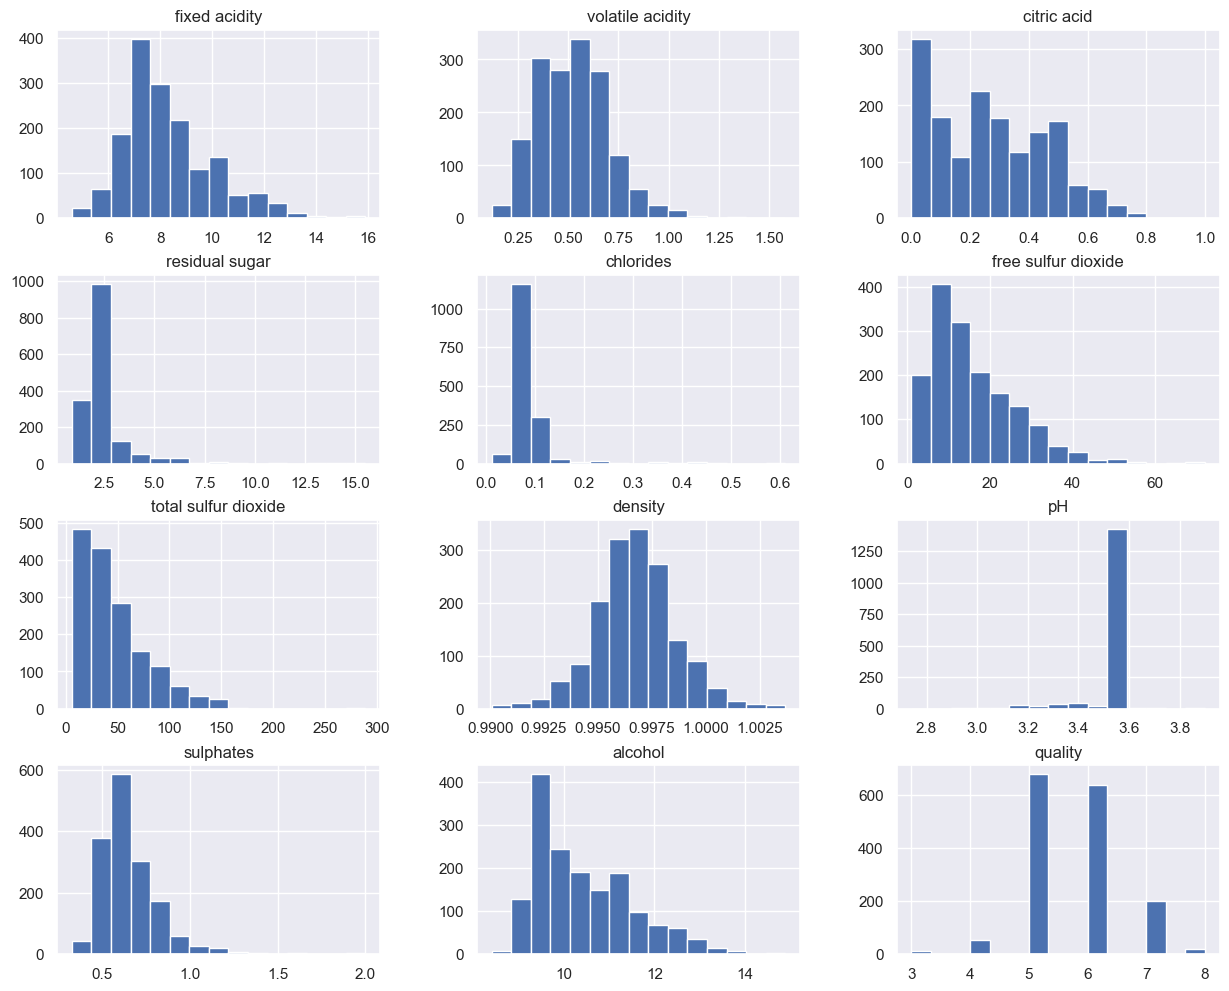

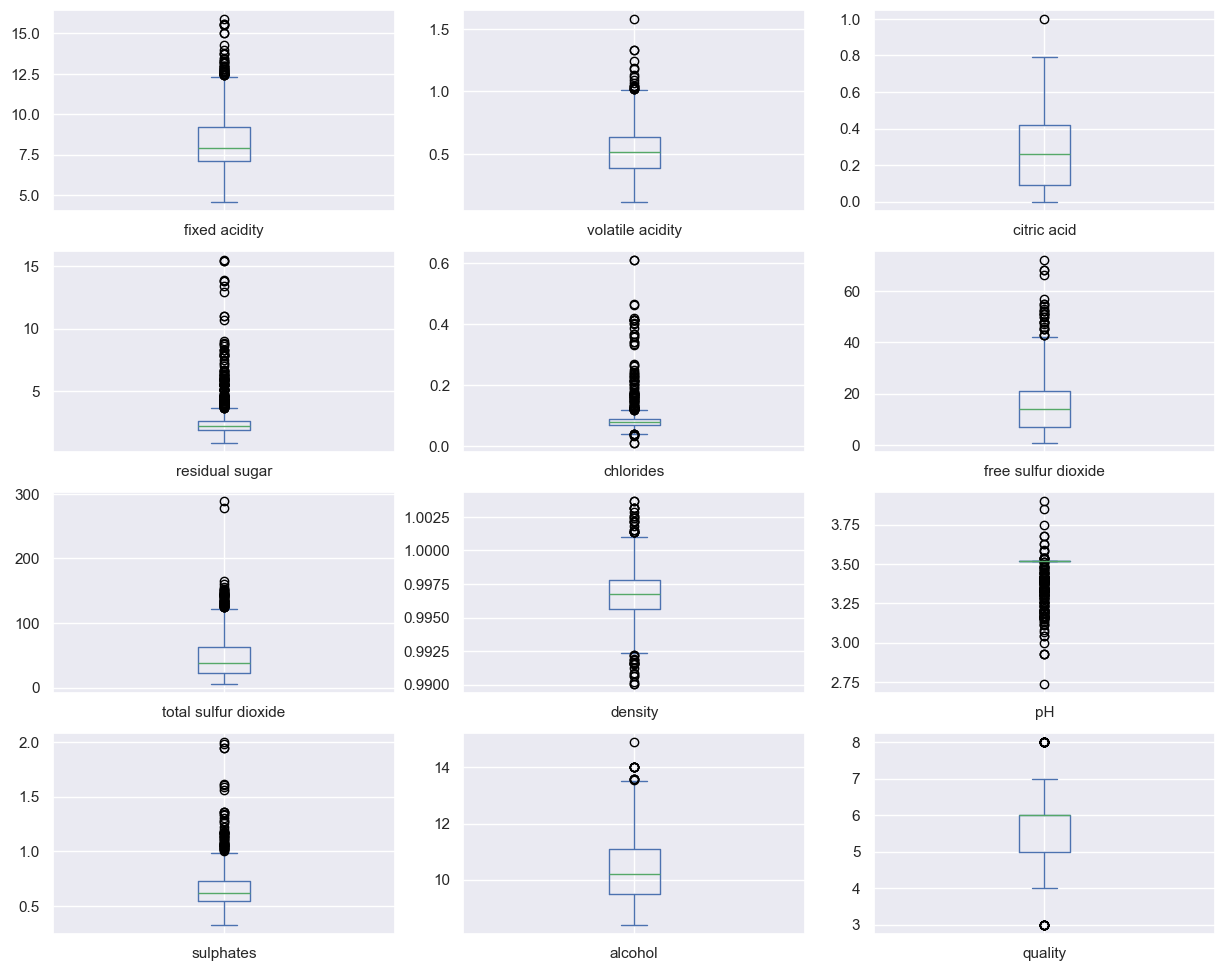

In [13]:
# Display summary statistics
print(data.describe())

# Histograms for each feature
data.hist(figsize=(15, 12), bins=15)
plt.show()

# Box plots to check for outliers
data.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 12))
plt.show()


In [14]:
data.shape

(1599, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
650,10.7,0.430,0.39,2.2,0.106,8.0,32.0,0.9986,3.52,0.50,9.6,5.0
240,8.9,0.635,0.37,1.7,0.263,5.0,62.0,0.9971,3.52,1.09,9.3,5.0
1309,7.0,0.620,0.10,1.4,0.071,27.0,63.0,0.9960,3.52,0.61,9.2,5.0
9,7.5,0.500,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.9964,3.38,0.59,9.8,6.0


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.shape

(1596, 12)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1596.000000       1596.000000  1596.000000     1596.000000   
mean        8.321366          0.527666     0.271128        2.536936   
std         1.742121          0.179154     0.194847        1.408341   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1596.000000          1596.000000           1596.000000  1596.000000   
mean      0.087487            15.882206             46.431078     0.996745   
std       0.047107            10.467380             32.893072     0.001889   
min       0.012000             1.000000         

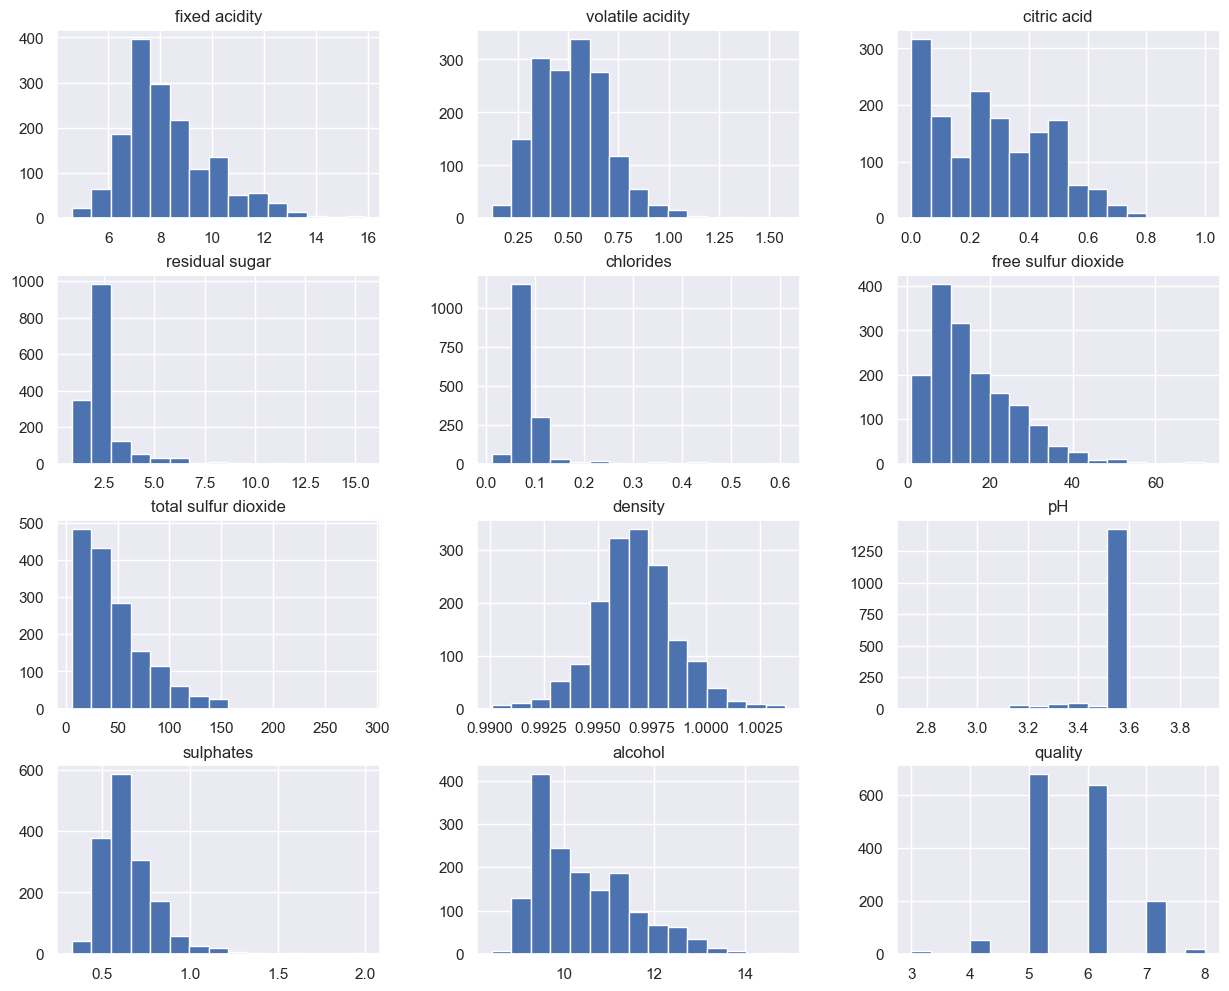

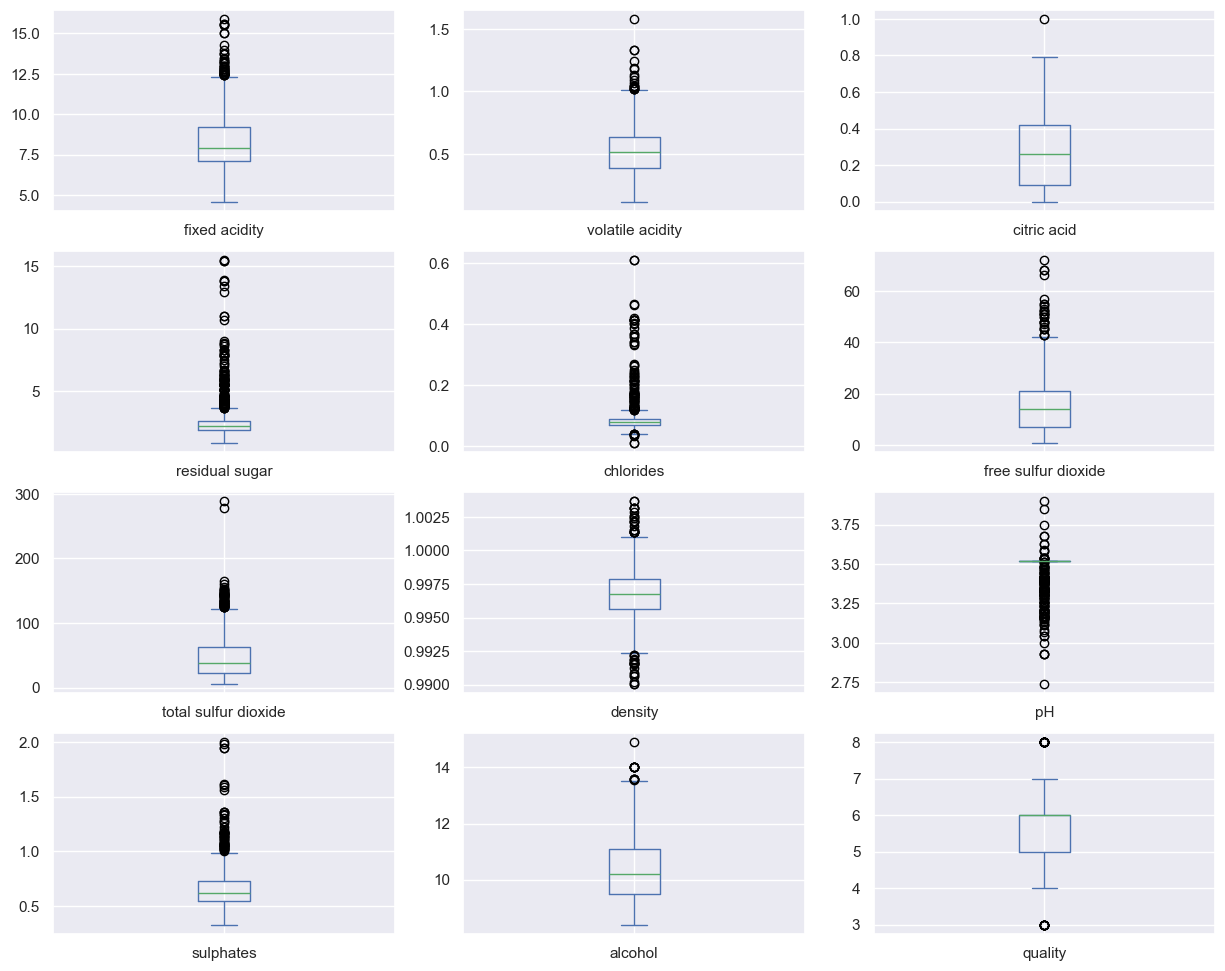

In [55]:
# Display summary statistics
print(data.describe())

# Histograms for each feature
data.hist(figsize=(15, 12), bins=15)
plt.show()

# Box plots to check for outliers
data.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 12))
plt.show()


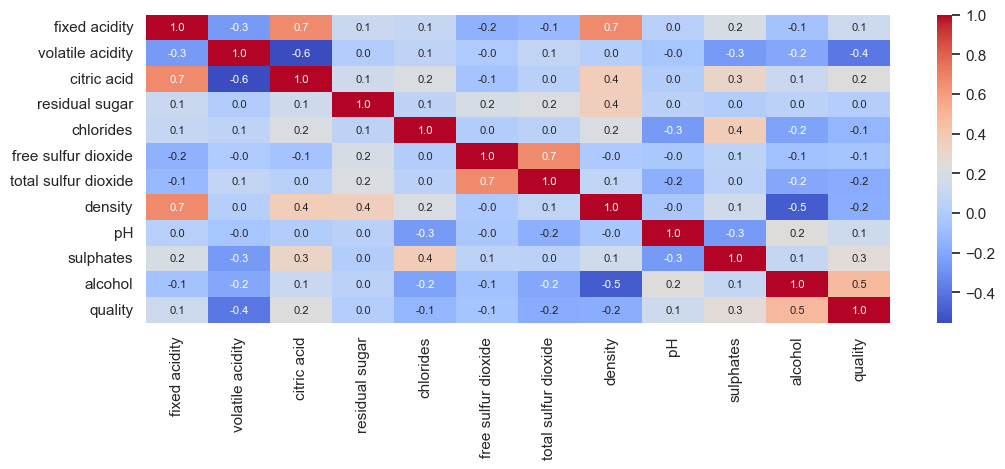

In [22]:
plt.figure(figsize=(12,4))
corelation = data.corr()
sns.heatmap(corelation, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')
plt.show()

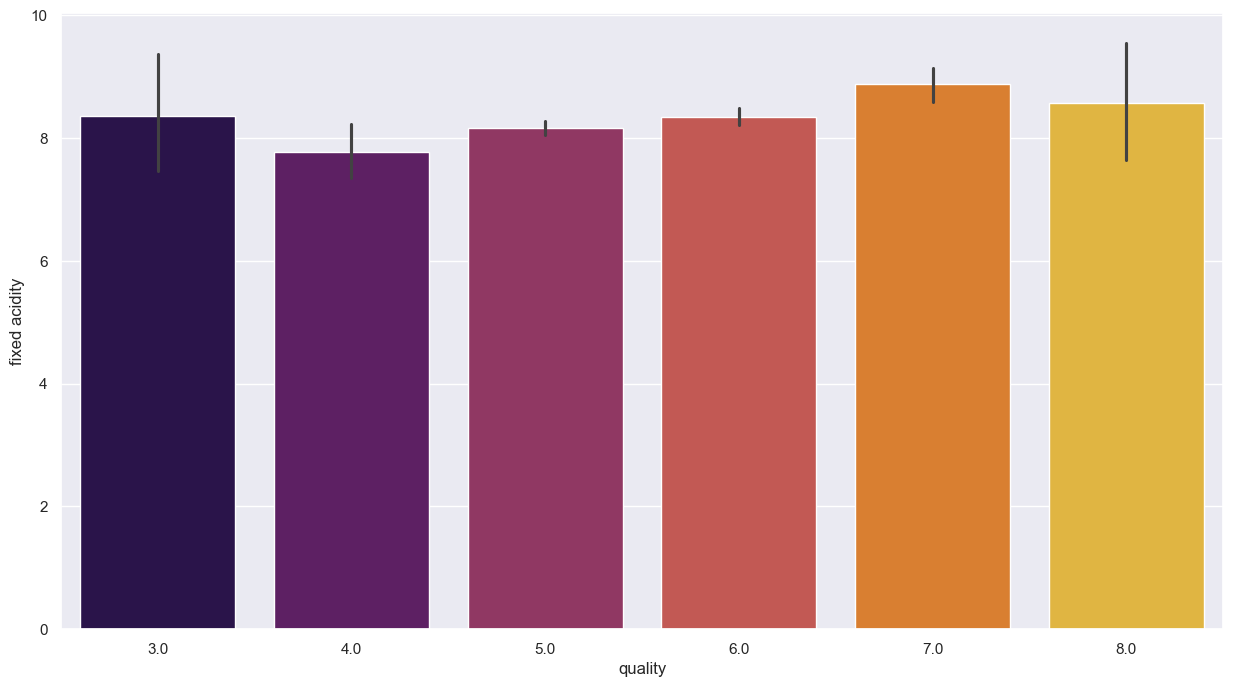

In [27]:
data.quality.unique()
data.quality.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(y=data['fixed acidity'],x=data.quality, palette='inferno')

plt.show()

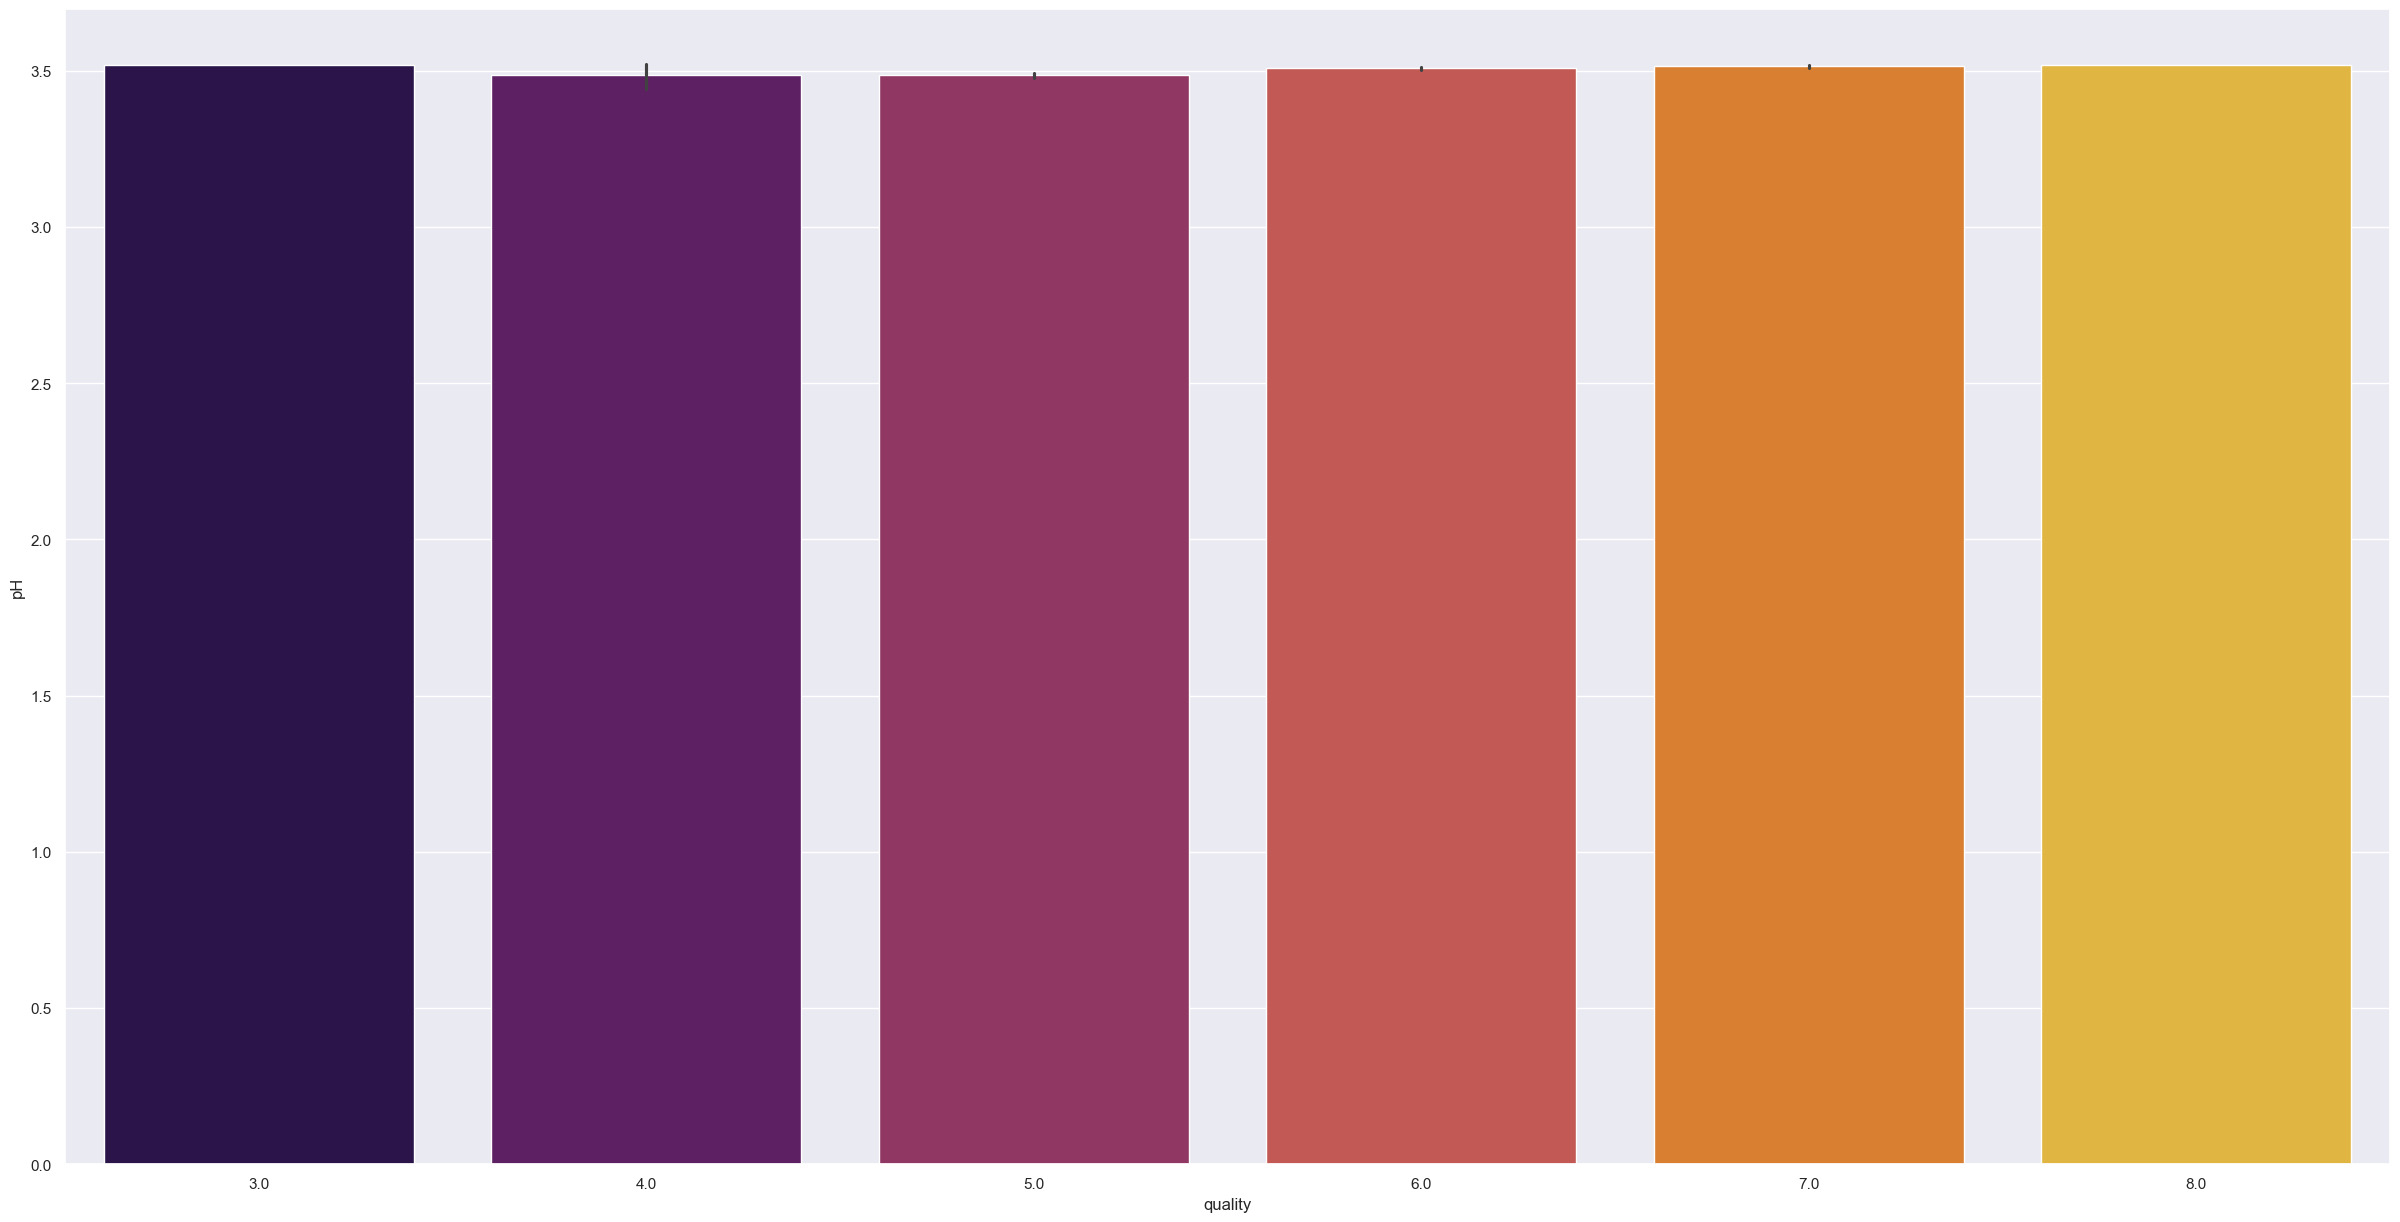

In [28]:
plt.figure(figsize=(30,15))
sns.barplot(y=data.pH,x=data.quality,palette='inferno')
plt.show()

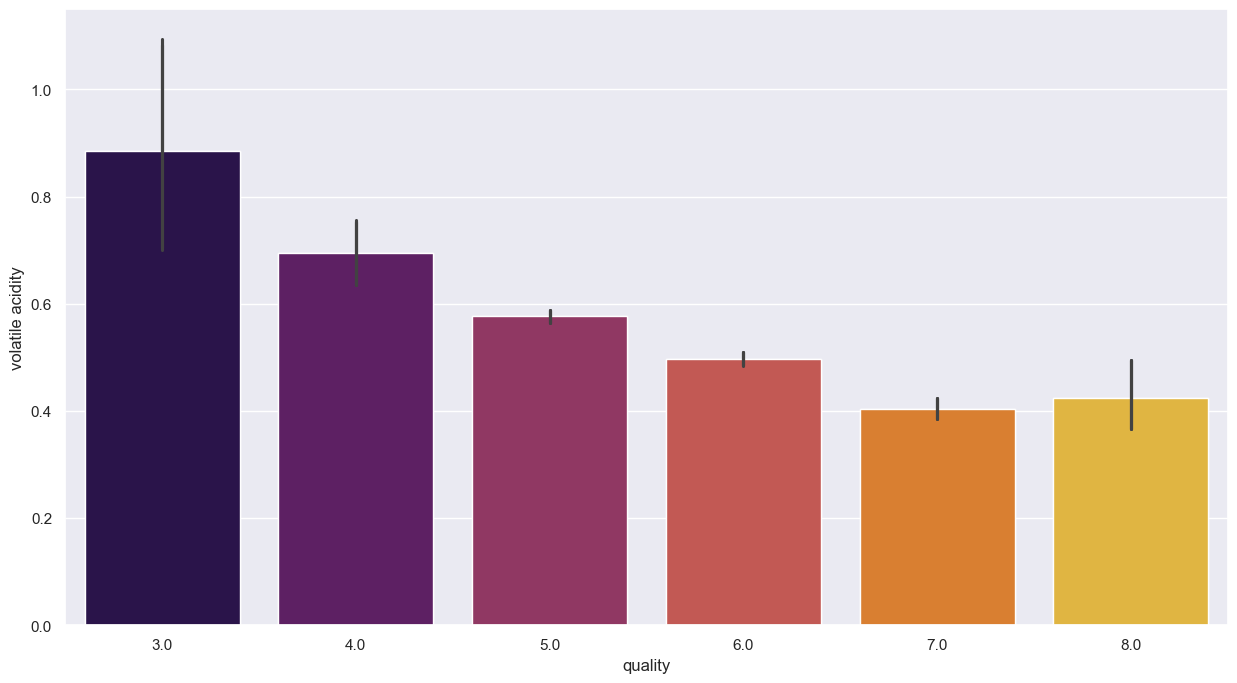

In [29]:
plt.figure(figsize=(15,8))

# Example: using 'quality' as a hue.
sns.barplot(y=data['volatile acidity'], x=data['quality'], hue=data['quality'], palette='inferno', legend=False)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.barplot(y=data['volatile acidity'], x=data['quality'], palette='inferno')
plt.show()

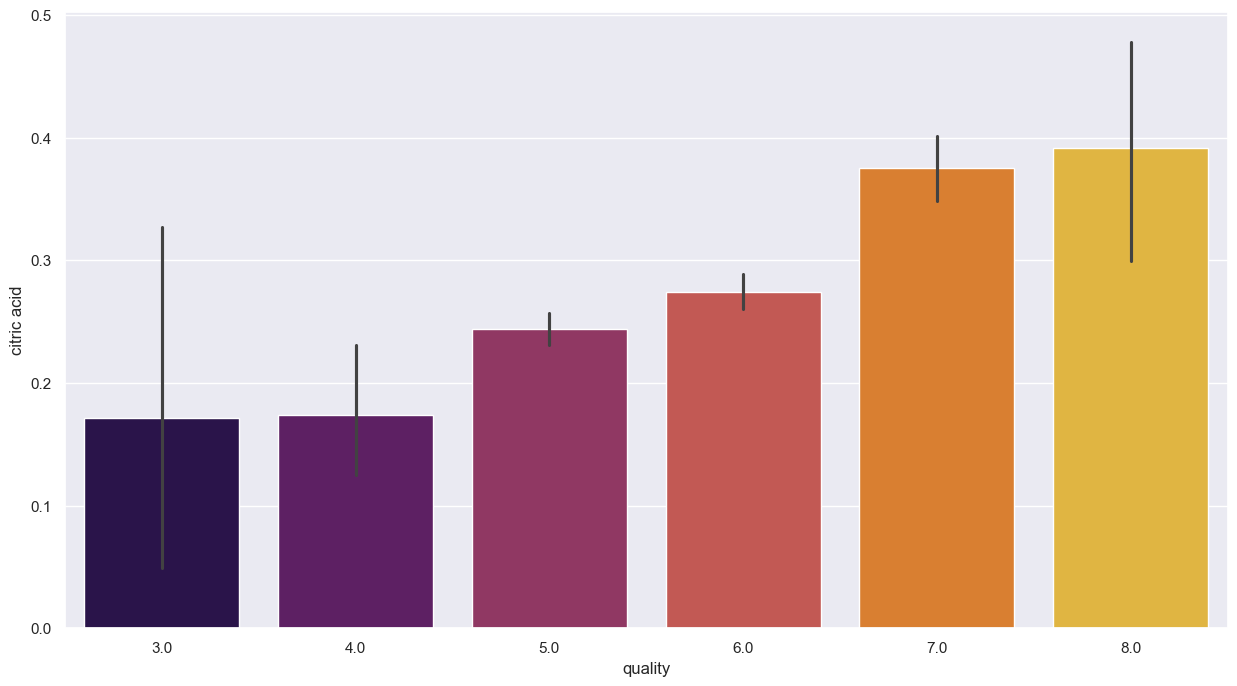

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['citric acid'],x=data.quality,palette='inferno')
plt.show()

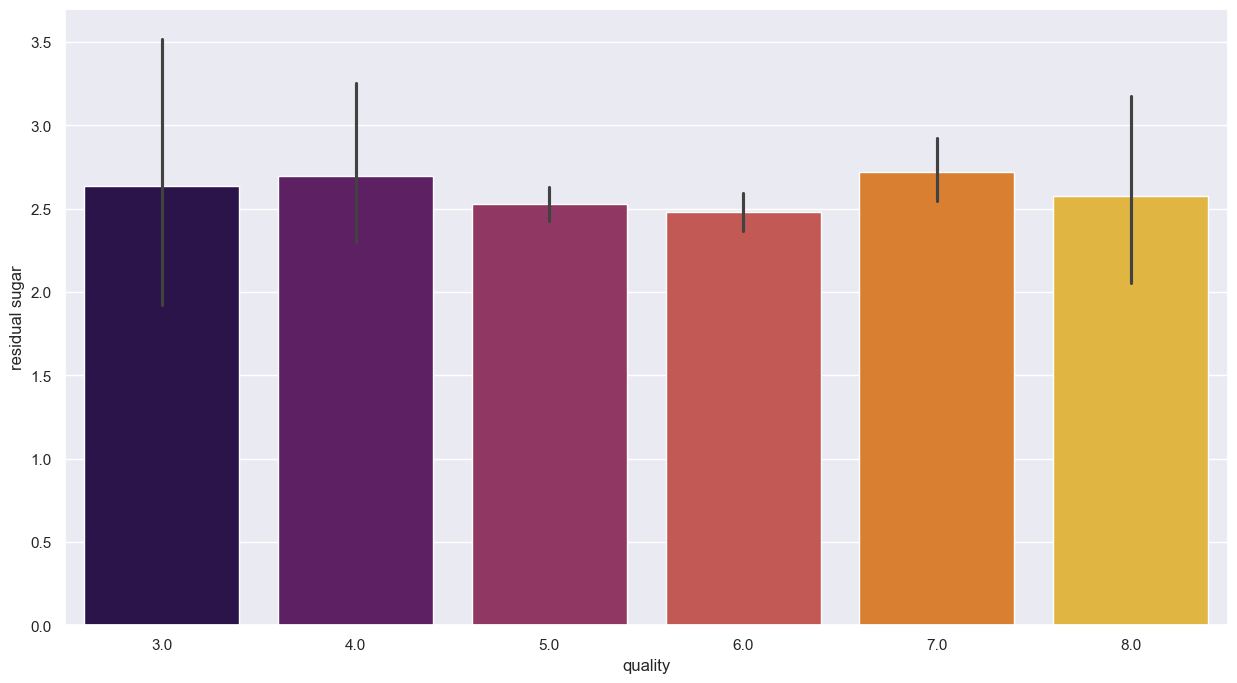

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['residual sugar'],x=data.quality,palette='inferno')
plt.show()

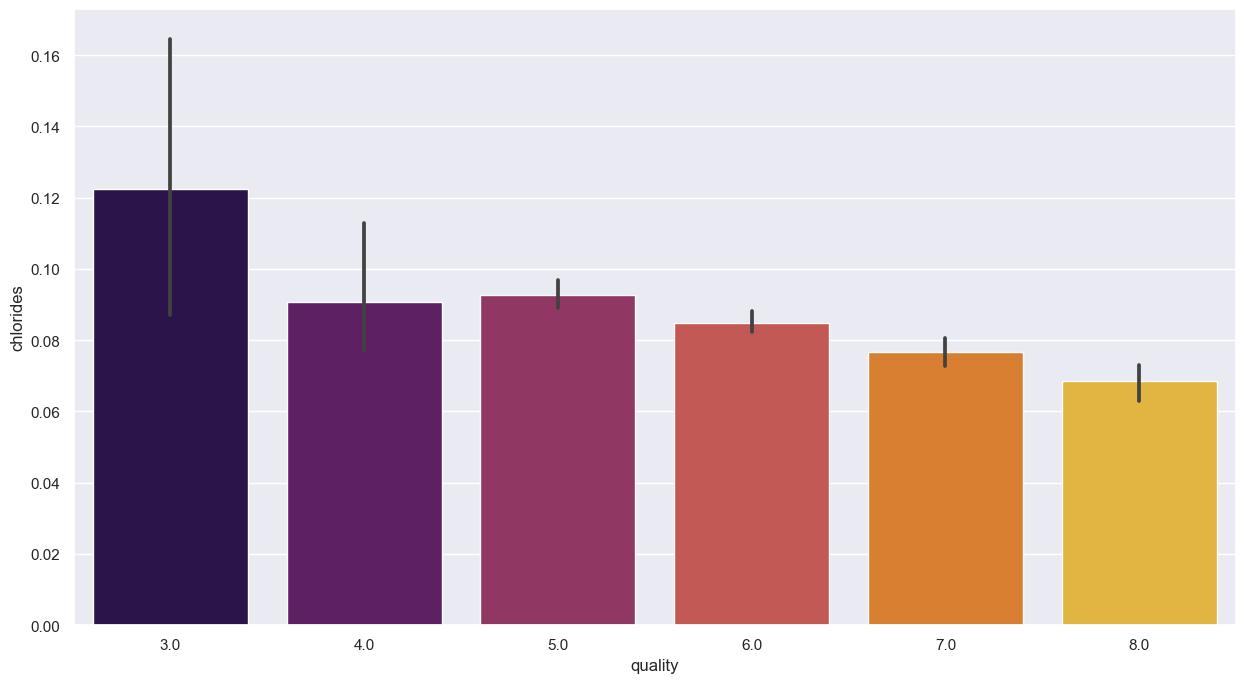

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['chlorides'],x=data.quality,palette='inferno')
plt.show()

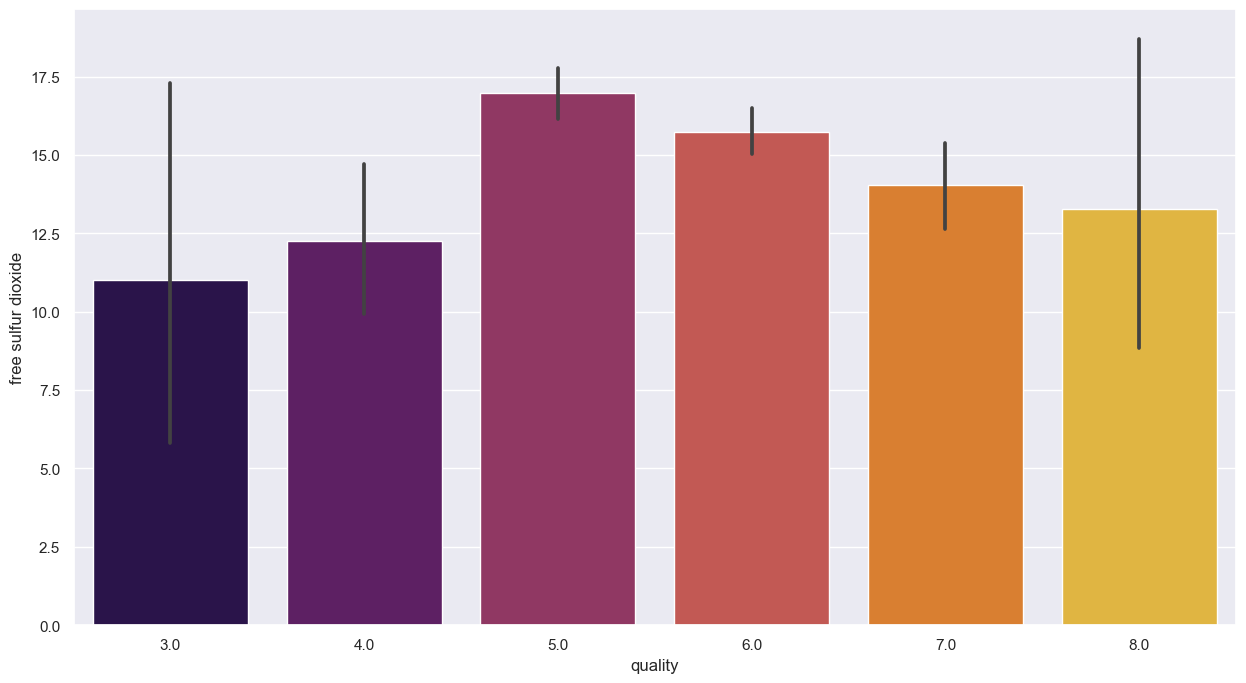

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['free sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

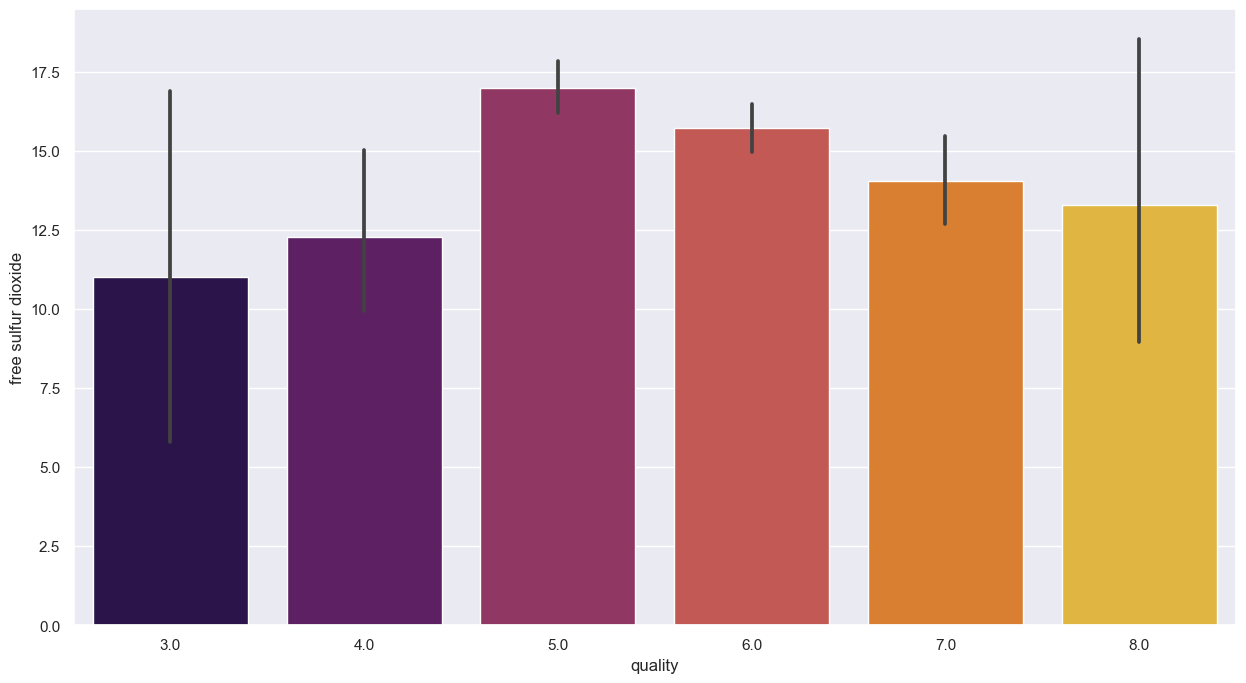

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['free sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

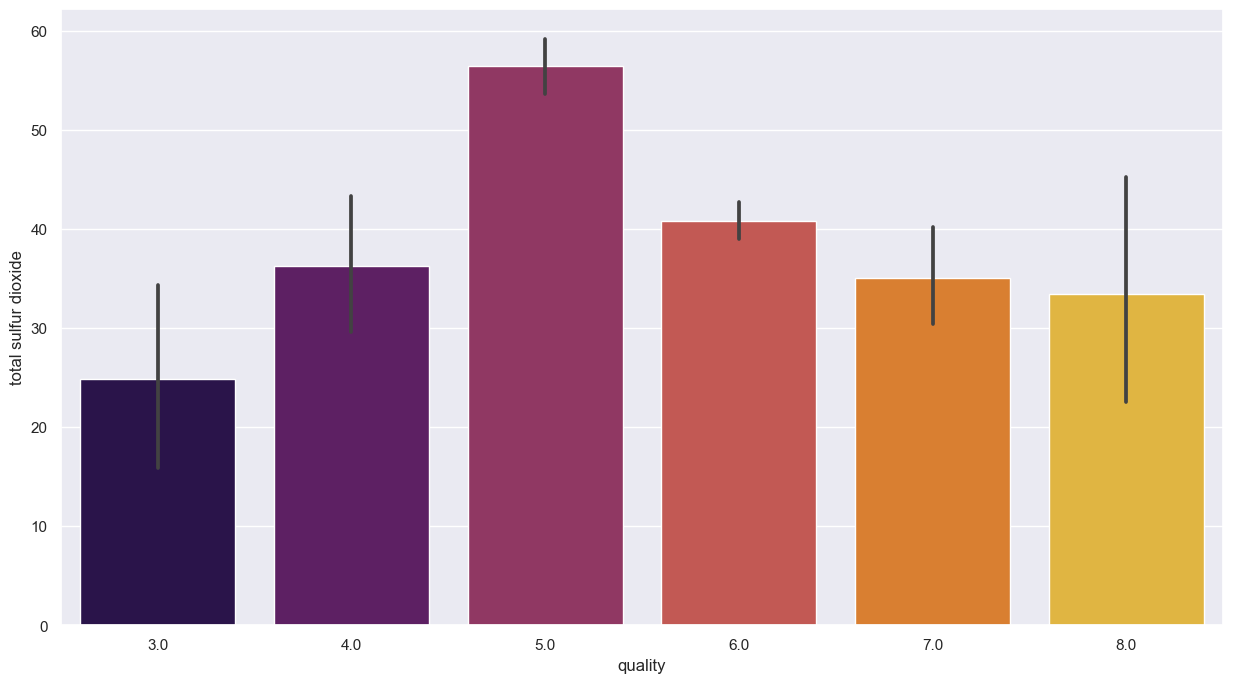

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['total sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

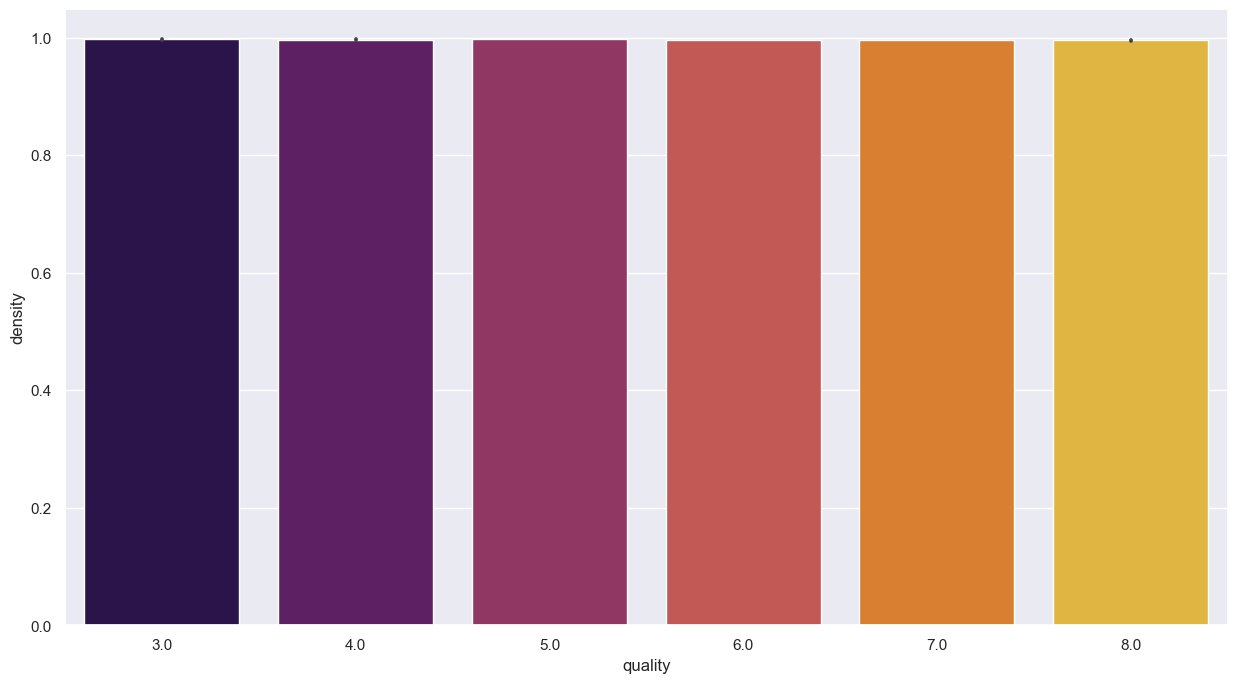

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['density'],x=data.quality,palette='inferno')
plt.show()

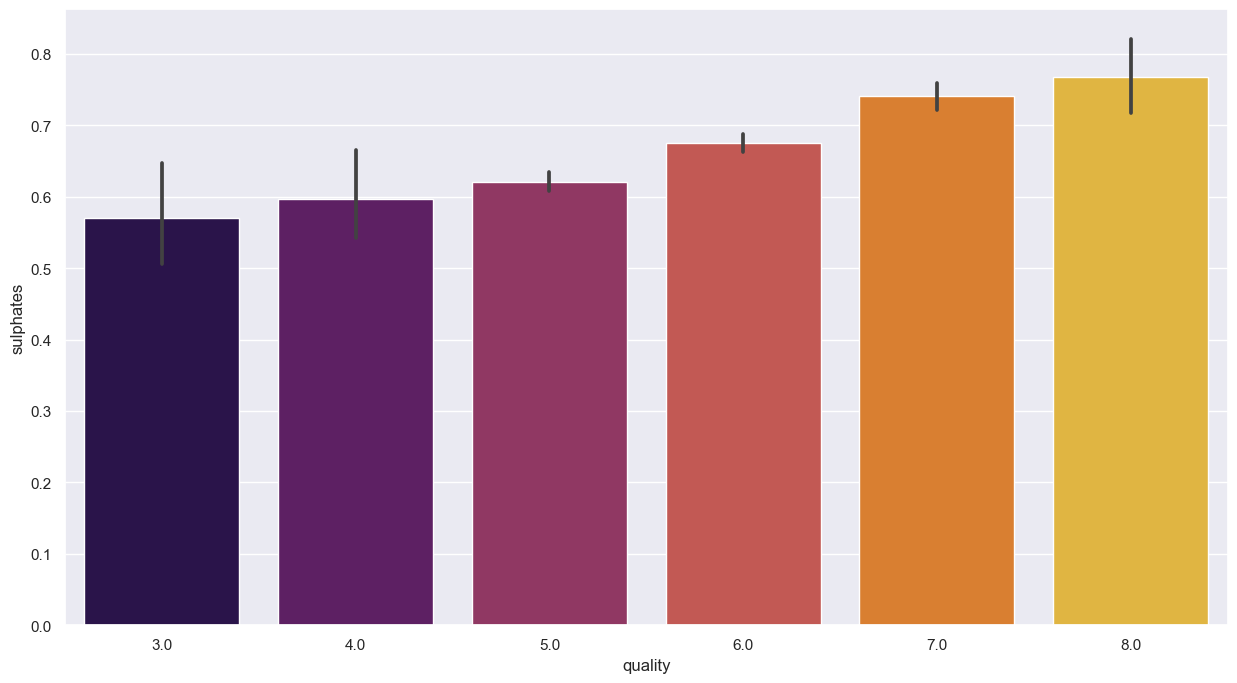

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['sulphates'],x=data.quality,palette='inferno')
plt.show()

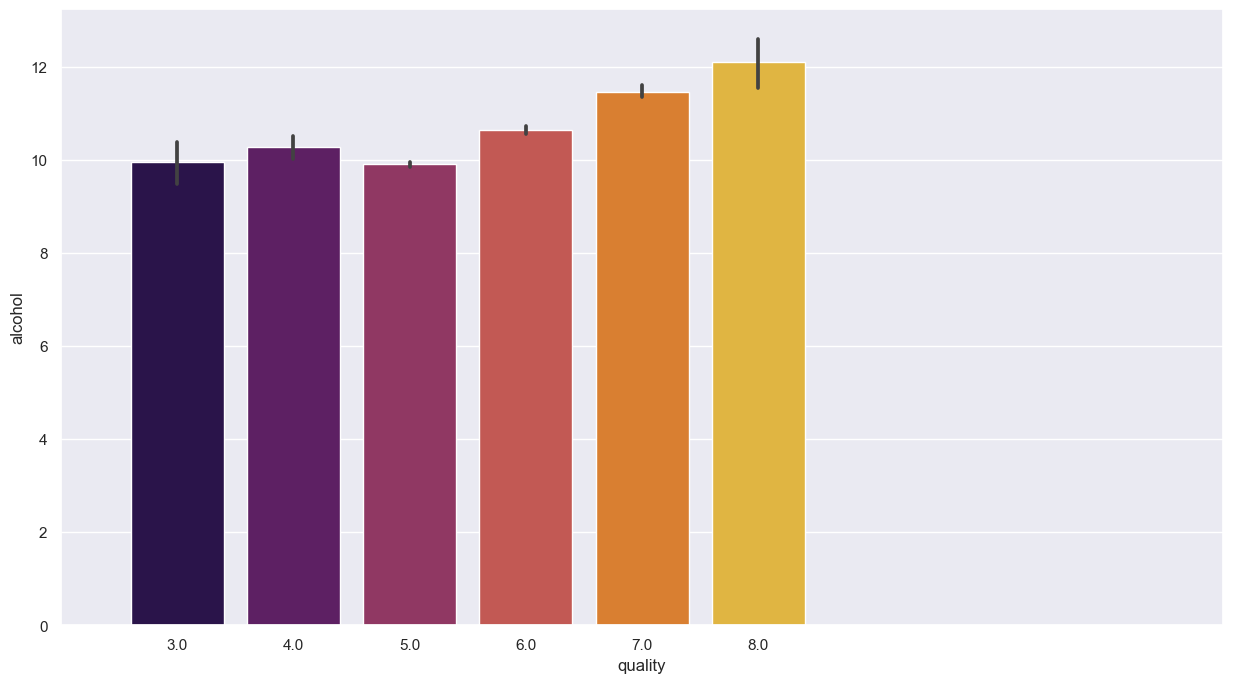

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['alcohol'],x=data.quality,palette='inferno')
plt.xlim(-1,9)
plt.show()

In [26]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
658,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.52,0.81,9.6,6.0
594,7.9,0.72,0.17,2.6,0.096,20.0,38.0,0.99780,3.52,0.53,9.5,5.0
1083,8.7,0.42,0.45,2.4,0.072,32.0,59.0,0.99617,3.52,0.77,12.0,6.0
297,7.1,0.63,0.06,2.0,0.083,8.0,29.0,0.99855,3.52,0.73,9.6,5.0
1221,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.52,0.77,11.5,6.0


In [27]:
x = data.drop(columns='quality',axis=1)
y = data['quality'].apply(lambda value : 1 if value >= 7 else 0)

In [28]:
y.unique()

array([0, 1], dtype=int64)

In [29]:
std = StandardScaler()
x = std.fit_transform(x)

In [30]:
x

array([[-0.52904176,  0.96223523, -1.39192434, ...,  0.14057855,
        -0.57917007, -0.9610637 ],
       [-0.2993646 ,  1.96727417, -1.39192434, ..., -3.72131159,
         0.12865108, -0.58572765],
       [-0.2993646 ,  1.29724821, -1.18657111, ..., -2.97384898,
        -0.04830421, -0.58572765],
       ...,
       [-1.16065393, -0.09863921, -0.72452634, ...,  0.26515565,
         0.54154675,  0.54028048],
       [-1.39033109,  0.65514   , -0.77586465, ...,  0.26515565,
         0.30560636, -0.21039161],
       [-1.3329118 , -1.21534915,  1.02097612, ...,  0.26515565,
         0.01068089,  0.54028048]])

In [31]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [34]:
from tpot import TPOTClassifier

# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='accuracy', random_state=42)

# Fit TPOTClassifier
tpot.fit(xtrain, ytrain)

# Evaluate TPOTClassifier
print("Accuracy on test set: {:.2f}%".format(tpot.score(xtest, ytest) * 100))


C:\Users\heaven.ether\anaconda3\envs\python_practice\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8902696078431372

Generation 2 - Current best internal CV score: 0.8902696078431372

Generation 3 - Current best internal CV score: 0.8902696078431372

Generation 4 - Current best internal CV score: 0.9028216911764705

Generation 5 - Current best internal CV score: 0.9028216911764705

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=66, p=1, weights=distance)
Accuracy on test set: 91.25%


Accuracy: 0.9125
Precision: 0.75
Recall: 0.5454545454545454
F1-score: 0.631578947368421


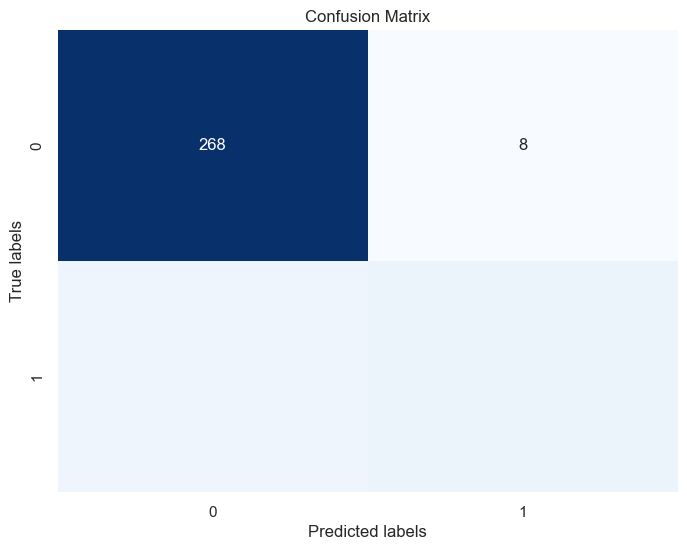

In [36]:
# Make predictions on the test set using the best pipeline found by TPOT
y_pred = tpot.predict(xtest)

# Calculate evaluation metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'), RandomForestClassifier(), GradientBoostingClassifier()]

def accuracy(features, labels):
    for model in models:
        print(model)
        model.fit(features, labels)
        train_pred = model.predict(features)
        accuracy = accuracy_score(train_pred, labels)
        print(accuracy)
        print('---------------------------')

print('accuracy of train data\n===========================')
accuracy(features=xtrain, labels=ytrain)
print('\n\naccuracy of test data\n===========================')
accuracy(features=xtest, labels=ytest)


accuracy of train data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.8855799373040752
---------------------------
SVC(kernel='poly')
0.9075235109717869
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.9647335423197492
---------------------------


accuracy of test data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.875
---------------------------
SVC(kernel='poly')
0.896875
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.996875
---------------------------


In [42]:
def crossval():
    for model in models:
        print(model)
        crossval = cross_val_score(model,xtest,ytest,cv=5)
        print('accuracy on each iteration',crossval)
        crossval = sum(crossval)/len(crossval)
        print('mean accuracy ',crossval)
crossval()

DecisionTreeClassifier()
accuracy on each iteration [0.859375 0.859375 0.84375  0.8125   0.78125 ]
mean accuracy  0.83125
LogisticRegression()
accuracy on each iteration [0.9375   0.90625  0.828125 0.875    0.8125  ]
mean accuracy  0.871875
SVC(kernel='poly')
accuracy on each iteration [0.859375 0.890625 0.859375 0.890625 0.859375]
mean accuracy  0.871875
RandomForestClassifier()
accuracy on each iteration [0.90625  0.90625  0.890625 0.84375  0.828125]
mean accuracy  0.875
GradientBoostingClassifier()
accuracy on each iteration [0.90625  0.890625 0.859375 0.84375  0.78125 ]
mean accuracy  0.85625


In [46]:
#creating dictionary that contains hyperparameter values for above mentioned models.

model_hyperparameters = {
    'DecisionTreeClassifier_hyperparameters': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression_hyperparameters': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'fit_intercept': [True, False],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500,1000,2000]
    },
    'SVC_hyperparameters': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
'RandomForestClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  # Corrected parameter
}

    ,

    'GradientBoostingClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'subsample': [0.8, 1.0]  
    }
}

In [47]:
model_keys = list(model_hyperparameters.keys())
model_keys

['DecisionTreeClassifier_hyperparameters',
 'LogisticRegression_hyperparameters',
 'SVC_hyperparameters',
 'RandomForestClassifier_hyperparameters',
 'GradientBoostingClassifier_hyperparameters']

In [48]:
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'),RandomForestClassifier(),GradientBoostingClassifier()]
def modelSelection(list_of_models,model_hyperparameters_dict):

    result = []
    i = 0

    for model in list_of_models:
        key = model_keys[i]

        params = model_hyperparameters_dict[key]

        i = i + 1

        print(model)
        print(params)

        classifier = RandomizedSearchCV(model,params,cv=5)
        classifier.fit(xtrain,ytrain)

        result.append({'model used' : model,
                       'highest score' : classifier.best_score_,
                       'best hyperparameters': classifier.best_params_})
        
    result_dataframe = pd.DataFrame(result,columns=['model used','highest score','best hyperparameters'])

    return result_dataframe


dataframe = modelSelection(list_of_models=models,model_hyperparameters_dict=model_hyperparameters)

DecisionTreeClassifier()
{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
LogisticRegression()
{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'fit_intercept': [True, False], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 500, 1000, 2000]}
SVC(kernel='poly')
{'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
RandomForestClassifier()
{'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}
GradientBoostingClassifier()
{'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 1.0]}


In [49]:
pd.set_option('display.max_colwidth', None)
dataframe

,model used,highest score,best hyperparameters
0,DecisionTreeClassifier(),0.871471,"{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}"
1,LogisticRegression(),0.881661,"{'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'fit_intercept': True, 'C': 10}"
2,SVC(kernel='poly'),0.884804,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 1}"
3,RandomForestClassifier(),0.906734,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}"
4,GradientBoostingClassifier(),0.901250,"{'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}"


In [50]:
model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,n_estimators=200)
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=200)

In [51]:
train_pred = model.predict(xtest)
accuracy = accuracy_score(ytest,train_pred)
accuracy

0.909375

In [52]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1590,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.52,0.82,11.6,6.0
1179,8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.52,0.81,11.0,6.0
1506,6.8,0.81,0.05,2.0,0.070,6.0,14.0,0.99562,3.52,0.66,10.8,6.0
154,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5.0
1463,6.9,0.63,0.01,2.4,0.076,14.0,39.0,0.99522,3.52,0.53,10.8,6.0


In [53]:
input = (9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.52,0.58,9.2)
input = np.asarray(input).reshape(1,-1)
input = std.transform(input)
pred = model.predict(input)
pred

C:\Users\heaven.ether\anaconda3\envs\python_practice\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
if pred[0] == 0:
    print('not a good quality wine')
else:
    print('good quality wine')

not a good quality wine


# Success

## Next we can perform the below- 

Model Evaluation Metrics: Apart from accuracy, consider calculating other evaluation metrics such as precision, recall, F1-score, and ROC-AUC score to get a comprehensive understanding of the model's performance.
##### 
Feature Importance: If your model supports it (like RandomForestClassifier and GradientBoostingClassifier), you can explore feature importance to understand which features contribute the most to the predictions. This insight can be valuable for understanding the underlying factors affecting wine quality.
##### 
Model Deployment: If you're satisfied with your model's performance, consider deploying it in a production environment where it can make real-time predictions. Flask or FastAPI are popular frameworks for deploying machine learning models as APIs.